In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [2]:
def f(x):
    return x**2-6*x+9 

In [3]:
def data_generator_const_sigma(x,sigma,samples):
    return np.random.normal(f(x),sigma,samples)

In [4]:
def data_generator_rel_sigma(x,sigma_0,samples):
    return np.random.normal(f(x),sigma_0*x,samples)

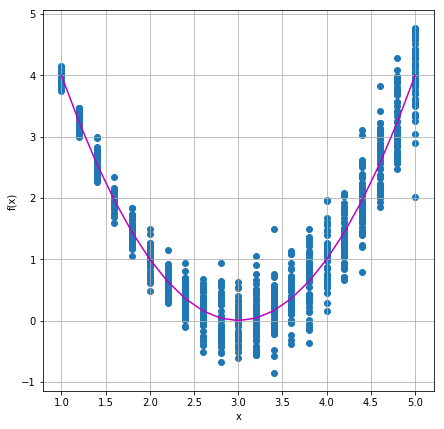

In [5]:
x_vals = np.arange(1,5.2,0.2)
x_arr = np.array([])
y_arr = np.array([])
samples = 50
for x in x_vals:
    x_arr = np.append(x_arr, np.full(samples,x))
    y_arr = np.append(y_arr, data_generator_rel_sigma(x,0.1,samples))
x_arr, y_arr = shuffle(x_arr, y_arr)
x_test = np.arange(1.1,5.1,0.2)

plt.figure(figsize=(7,7))
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.scatter(x_arr,y_arr)
plt.plot(x_vals,map(f,x_vals),c='m')

In [6]:
def nn_layer(prev_layer, weights, bias, activation=None):
    layer = tf.add(tf.matmul(prev_layer,weights),bias)
    if activation == 'tanh':
        layer = tf.nn.tanh(layer)
    elif activation == 'relu':
        layer = tf.nn.relu(layer)
    return layer

Epoch 0 | cost = 3.0653
Epoch 50 | cost = 1.5807
Epoch 100 | cost = 0.2863
Epoch 150 | cost = 0.1990
Epoch 200 | cost = 0.1644
Epoch 250 | cost = 0.1435
Epoch 300 | cost = 0.1313
Epoch 350 | cost = 0.1237
Epoch 400 | cost = 0.1185
Epoch 450 | cost = 0.1148
Epoch 500 | cost = 0.1125
Epoch 550 | cost = 0.1112
Epoch 600 | cost = 0.1106
Epoch 650 | cost = 0.1103
Epoch 700 | cost = 0.1102
Epoch 750 | cost = 0.1101
Epoch 800 | cost = 0.1101
Epoch 850 | cost = 0.1101
Epoch 900 | cost = 0.1101
Epoch 950 | cost = 0.1102
Final cost = 0.1102


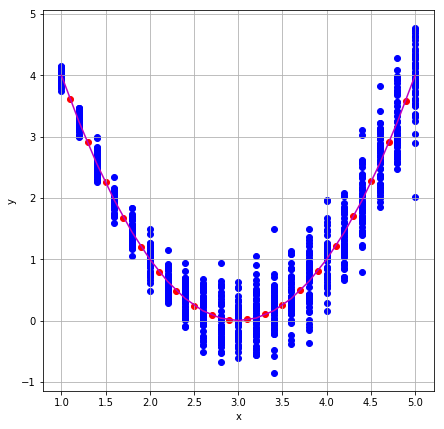

In [7]:
hidden_layers_size = [12,12,12]
epochs=1000
batch_size=50
learning_rate=0.0003
display_step=50

w = dict()
b = dict()
tf.reset_default_graph()
L = len(hidden_layers_size) + 2
_ls = [1]+hidden_layers_size+[1]
for i in range(1,L):
    w[i] = tf.get_variable(name='w'+str(i), shape=[_ls[i-1],_ls[i]],
                           initializer=tf.contrib.layers.xavier_initializer())
    b[i] = tf.get_variable(name='b'+str(i), shape=_ls[i],
                           initializer=tf.zeros_initializer())
x = tf.placeholder(name='x',shape=(None,1),dtype=tf.float32)
y = tf.placeholder(name='y',shape=(None,1),dtype=tf.float32)

layer = x
for i in range(1,L):
    if i != L-1:
        layer = nn_layer(layer,w[i],b[i],'tanh')
    else:
        output = nn_layer(layer,w[i],b[i])
cost = tf.reduce_mean(tf.losses.mean_squared_error(labels=y,predictions=output))
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)
batch_num = int(len(x_arr) / batch_size)
x_batches = np.array_split(x_arr, batch_num)
y_batches = np.array_split(y_arr, batch_num)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(epochs):
        avg_cost = 0
        for i in range(batch_num):
            x_batch = np.expand_dims(x_batches[i],axis=1)
            y_batch = np.expand_dims(y_batches[i],axis=1)
            _, c = sess.run([optimizer,cost], feed_dict={x:x_batch, y:y_batch})
            avg_cost += c/batch_num
        if epoch % display_step == 0:
            print('Epoch {0} | cost = {1:.4f}'.format(epoch,avg_cost))
    print('Final cost = {0:.4f}'.format(avg_cost))
    y_pred = sess.run(output,feed_dict={x:np.expand_dims(x_test,axis=1)})

plt.figure(figsize=(7,7))
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(x_arr,y_arr,c='b')
plt.scatter(x_test,y_pred,c='r')
plt.plot(x_vals,map(f,x_vals),c='m')
plt.show()

In [8]:
def mdn_cost(mu, sigma, y):
    dist = tf.distributions.Normal(loc=mu, scale=tf.abs(sigma))
    return tf.reduce_mean(-dist.log_prob(y))

Epoch 0 | cost = 3.7001
Epoch 50 | cost = 1.7343
Epoch 100 | cost = 1.6434
Epoch 150 | cost = 0.9743
Epoch 200 | cost = 0.3856
Epoch 250 | cost = 0.3293
Epoch 300 | cost = 0.2817
Epoch 350 | cost = 0.2417
Epoch 400 | cost = 0.2111
Epoch 450 | cost = 0.1898
Epoch 500 | cost = 0.1760
Epoch 550 | cost = 0.1675
Epoch 600 | cost = 0.1623
Epoch 650 | cost = 0.1592
Epoch 700 | cost = 0.1573
Epoch 750 | cost = 0.1560
Epoch 800 | cost = 0.1552
Epoch 850 | cost = 0.1545
Epoch 900 | cost = 0.1540
Epoch 950 | cost = 0.1535
Final cost = 0.1531


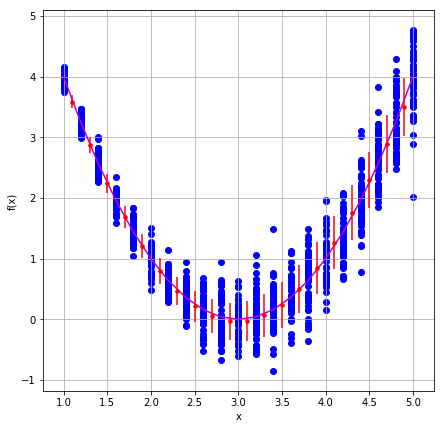

In [9]:
hidden_layers_size = [12,12,12]
epochs=1000
batch_size=50
learning_rate=0.0003
display_step=50

w = dict()
b = dict()
tf.reset_default_graph()
L = len(hidden_layers_size) + 2
_ls = [1]+hidden_layers_size
for i in range(1,L-1):
    w[i] = tf.get_variable(name='w'+str(i), shape=[_ls[i-1],_ls[i]],
                           initializer=tf.contrib.layers.xavier_initializer())
    b[i] = tf.get_variable(name='b'+str(i), shape=_ls[i],
                           initializer=tf.zeros_initializer())
for t in ['mu','sigma']:
    w[t] = tf.get_variable(name='w_'+t, shape=[_ls[-1],1],
                           initializer=tf.contrib.layers.xavier_initializer())
    b[t] = tf.get_variable(name='b_'+t, shape=1,
                           initializer=tf.zeros_initializer())
x = tf.placeholder(name='x',shape=(None,1),dtype=tf.float32)
y = tf.placeholder(name='y',shape=(None,1),dtype=tf.float32)

layer = x
for i in range(1,L):
    if i != L-1:
        layer = nn_layer(layer,w[i],b[i],'tanh')
    else:
        mu = nn_layer(layer,w['mu'],b['mu'])
        sigma = nn_layer(layer,w['sigma'],b['sigma'])
cost = mdn_cost(mu, sigma, y)
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)
batch_num = int(len(x_arr) / batch_size)
x_batches = np.array_split(x_arr, batch_num)
y_batches = np.array_split(y_arr, batch_num)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(epochs):
        avg_cost = 0
        for i in range(batch_num):
            x_batch = np.expand_dims(x_batches[i],axis=1)
            y_batch = np.expand_dims(y_batches[i],axis=1)
            _, c = sess.run([optimizer,cost], feed_dict={x:x_batch, y:y_batch})
            avg_cost += c/batch_num
        if epoch % display_step == 0:
            print('Epoch {0} | cost = {1:.4f}'.format(epoch,avg_cost))
    print('Final cost = {0:.4f}'.format(avg_cost))
    mu_pred, sigma_pred = sess.run([mu,sigma],feed_dict={x:np.expand_dims(x_test,axis=1)})

plt.figure(figsize=(7,7))
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.errorbar(x_test,mu_pred,yerr=np.absolute(sigma_pred),c='r',ls='None',marker='.',ms=7)
plt.scatter(x_arr,y_arr,c='b')
plt.plot(x_vals,map(f,x_vals),c='m')
plt.show()